<a href="https://colab.research.google.com/github/Khaled-Mohammed-Abdelgaber/deep-learning-projects-/blob/main/houses_prices_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import boston_housing
(train_data,train_target),(test_data,test_target) = boston_housing.load_data()

In [2]:
train_data.shape , test_data.shape

((404, 13), (102, 13))

In [3]:
mean = train_data.mean()
train_data -= mean
std = train_data.std()
train_data /= std

"""Note that the quantities used for normalizing the test data are computed using the
training data. You should never use in your workflow any quantity computed on the
test data, even for something as simple as data normalization."""

test_data -= mean
test_data /= std

In [4]:
from keras import models
from keras.layers import Dense
def build_model():
  model = models.Sequential()
  model.add(Dense(64 , activation="relu",input_shape = (train_data.shape[1],)))
  model.add(Dense(64 , activation = 'relu'))
  model.add(Dense(1)) #network ends with a single unit and no activation (it will be a linear layer
  model.compile(optimizer = 'rmsprop',loss = 'mse',metrics = ['mae'])  #for regression problem can not use accuracy or recall or precision
  return model

In [9]:
import numpy as np
k = 4 
val_samples = len(train_data) //k
num_epochs = 100
all_scores = []
for i in range(k):
  val_data = train_data[i*val_samples : (i+1)*val_samples]
  val_target = train_target[i*val_samples : (i+1)*val_samples]
  train_part = np.concatenate((train_data[:i*val_samples],train_data[(i+1)*val_samples:]))
  target_part = np.concatenate((train_target[:i*val_samples],train_target[(i+1)*val_samples:]),axis = 0)
  model = build_model()
  history = model.fit(train_part ,target_part,epochs = num_epochs , batch_size = 1,verbose =0 )
  val_mse ,val_mae = model.evaluate(val_data,val_target )
  all_scores.append(val_mae)

4/4 [==============================] - 0s 4ms/step - loss: 48.9897 - mae: 4.6610


In [10]:
all_scores

[4.195662498474121, 4.101700782775879, 3.5551486015319824, 4.661049842834473]

In [11]:
np.mean(all_scores)

4.128390431404114

In [12]:
history.history.keys()

dict_keys(['loss', 'mae'])

In [13]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * val_samples: (i + 1) * val_samples]
  val_targets = train_target[i * val_samples: (i + 1) * val_samples]
  partial_train_data = np.concatenate( [train_data[:i * val_samples], train_data[(i + 1) * val_samples:]], axis=0)
  partial_train_targets = np.concatenate( [train_target[:i * val_samples], train_target[(i + 1) * val_samples:]], axis=0)
  model = build_model()
  history = model.fit(partial_train_data, partial_train_targets, validation_data=(val_data, val_targets), epochs=num_epochs, batch_size=1, verbose=0)
  mae_history = history.history['mae']
  all_mae_histories.append(mae_history)
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


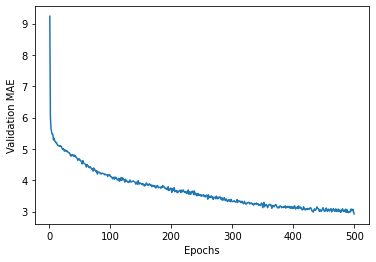

In [14]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

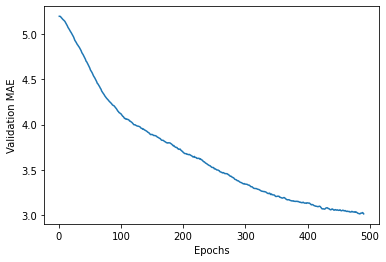

In [15]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [23]:
model = build_model()
model.fit(train_data, train_target, epochs=400, batch_size=16, verbose=1)
test_mse_score, test_mae_score = model.evaluate(test_data, test_target)

Epoch 1/400
26/26 [==============================] - 1s 2ms/step - loss: 520.3444 - mae: 20.7747
Epoch 2/400
26/26 [==============================] - 0s 2ms/step - loss: 348.0362 - mae: 15.9172
Epoch 3/400
26/26 [==============================] - 0s 2ms/step - loss: 179.4899 - mae: 10.1071
Epoch 4/400
26/26 [==============================] - 0s 2ms/step - loss: 111.7803 - mae: 7.8083
Epoch 5/400
26/26 [==============================] - 0s 2ms/step - loss: 95.4865 - mae: 7.1478
Epoch 6/400
26/26 [==============================] - 0s 2ms/step - loss: 86.5503 - mae: 6.5972
Epoch 7/400
26/26 [==============================] - 0s 2ms/step - loss: 78.2665 - mae: 6.1491
Epoch 8/400
26/26 [==============================] - 0s 2ms/step - loss: 72.3327 - mae: 5.9382
Epoch 9/400
26/26 [==============================] - 0s 2ms/step - loss: 69.2594 - mae: 5.7905
Epoch 10/400
26/26 [==============================] - 0s 2ms/step - loss: 66.4575 - mae: 5.7272
Epoch 11/400
26/26 [======================

In [24]:
test_mse_score, test_mae_score

(30.939697265625, 3.698493719100952)